# Иммитационная модель оптимизации занятости сервера БД

In [6]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt

# Constants for the simulation
NUM_CLIENTS = 10    # Number of clients
DB_PROCESS_TIME = (5, 10)  # (min, max) processing time for the database

# Function to simulate a database access
def database_access(env, client_id, db):
    print(f'Client {client_id} requesting access at {env.now}')
    with db.request() as request:
        # Wait for the request to be granted
        yield request
        # Simulate the time taken for db processing
        process_time = random.randint(*DB_PROCESS_TIME)
        yield env.timeout(process_time)
        print(f'Client {client_id} finished access at {env.now} after {process_time} time units')

# Function to create clients that access the database
def client_generator(env, db):
    for i in range(NUM_CLIENTS):
        env.process(database_access(env, i, db))
        yield env.timeout(random.uniform(1, 3))  # Time between client requests


# Create a SimPy environment
env = simpy.Environment()
# Create a shared resource (the database)
db = simpy.Resource(env, capacity=10)  # Only one client can access the database at a time
# Start the client generator process
env.process(client_generator(env, db))
# Run the simulation
env.run()



Client 0 requesting access at 0
Client 1 requesting access at 1.9539594651147139
Client 2 requesting access at 3.5511847698594807
Client 3 requesting access at 6.25808067099769
Client 0 finished access at 7 after 7 time units
Client 4 requesting access at 8.334521806218152
Client 1 finished access at 9.953959465114714 after 8 time units
Client 5 requesting access at 10.42678642568583
Client 2 finished access at 11.55118476985948 after 8 time units
Client 6 requesting access at 13.222409120484219
Client 7 requesting access at 14.66125238972709
Client 3 finished access at 16.25808067099769 after 10 time units
Client 8 requesting access at 16.63253637732409
Client 4 finished access at 17.334521806218152 after 9 time units
Client 9 requesting access at 18.304795464720854
Client 5 finished access at 18.42678642568583 after 8 time units
Client 6 finished access at 21.22240912048422 after 8 time units
Client 7 finished access at 22.66125238972709 after 8 time units
Client 8 finished access at

Client 0 requesting access at time 0
Client 1 requesting access at time 2.50401964710957
Client 2 requesting access at time 4.008562710674331
Client 3 requesting access at time 5.949176383100426
Client 1 finished access at time 7.50401964710957 (process time: 5)
Client 0 finished access at time 8 (process time: 8)
Client 4 requesting access at time 8.028014478945494
Client 5 requesting access at time 9.47645881038499
Client 6 requesting access at time 12.03892490960678
Client 4 finished access at time 13.028014478945494 (process time: 5)
Client 2 finished access at time 14.008562710674331 (process time: 10)
Client 7 requesting access at time 14.34243422009456
Client 3 finished access at time 14.504019647109569 (process time: 7)
Client 8 requesting access at time 15.741155584819627
Client 9 requesting access at time 17.983826897991943
Client 5 finished access at time 18.028014478945494 (process time: 5)
Client 7 finished access at time 19.50401964710957 (process time: 5)
Client 6 finish

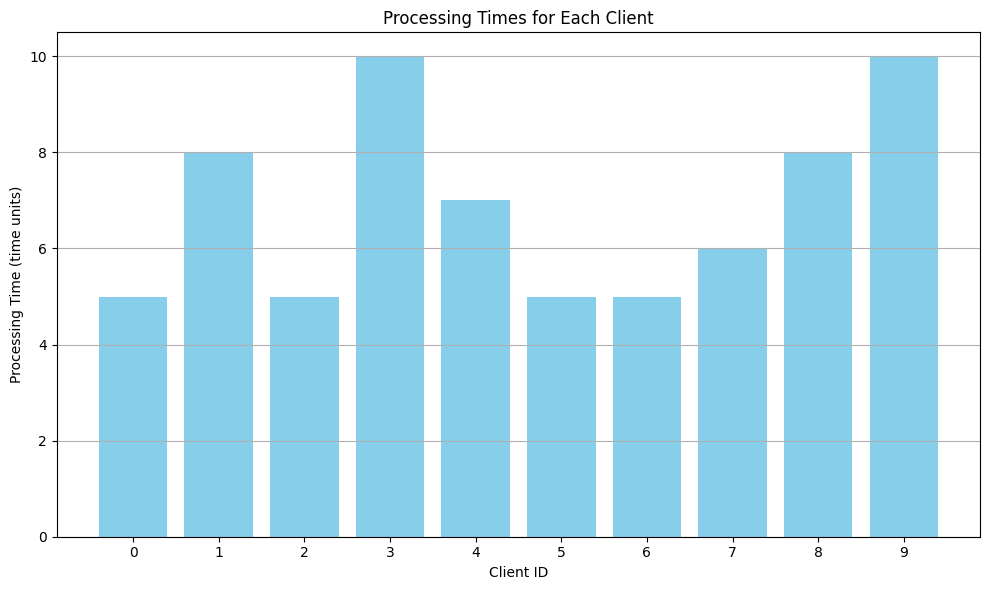

In [8]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt

# Constants for the simulation
NUM_CLIENTS = 10    # Number of clients
DB_PROCESS_TIME = (5, 10)  # (min, max) processing time for the database

# A list to track processing times for later visualization
processing_times = []

# Function to simulate a database access
def database_access(env, client_id, db):
    print(f'Client {client_id} requesting access at time {env.now}')
    with db.request() as request:
        # Wait for the request to be granted
        yield request
        # Simulate the time taken for DB processing
        process_time = random.randint(*DB_PROCESS_TIME)
        yield env.timeout(process_time)
        
        # Store the processing time for later use
        processing_times.append(process_time)
        print(f'Client {client_id} finished access at time {env.now} (process time: {process_time})')

# Function to create clients that access the database
def client_generator(env, db):
    for i in range(NUM_CLIENTS):
        env.process(database_access(env, i, db))
        yield env.timeout(random.uniform(1, 3))  # Time between client requests

# Main simulation setup

# Create a SimPy environment
env = simpy.Environment()
# Create a shared resource (the database)
db = simpy.Resource(env, capacity=3)  # Only one client can access the database at a time
# Start the client generator process
env.process(client_generator(env, db))
# Run the simulation
env.run()

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(processing_times)), processing_times, color='skyblue')
plt.title('Processing Times for Each Client')
plt.xlabel('Client ID')
plt.ylabel('Processing Time (time units)')
plt.xticks(range(len(processing_times)))
plt.grid(axis='y')
plt.tight_layout()
plt.show()




Client 0 requesting indexed access at time 0
Client 1 requesting non-indexed access at time 1
Client 0 finished indexed access at time 1 (process time: 1)
Client 2 requesting indexed access at time 2
Client 3 requesting non-indexed access at time 3
Client 2 finished indexed access at time 3 (process time: 1)
Client 4 requesting indexed access at time 4
Client 5 requesting non-indexed access at time 5
Client 6 requesting indexed access at time 6
Client 4 finished indexed access at time 7 (process time: 3)
Client 7 requesting non-indexed access at time 7
Client 6 finished indexed access at time 8 (process time: 2)
Client 8 requesting indexed access at time 8
Client 9 requesting non-indexed access at time 9
Client 1 finished non-indexed access at time 10 (process time: 9)
Client 10 requesting indexed access at time 10
Client 3 finished non-indexed access at time 11 (process time: 8)
Client 8 finished indexed access at time 11 (process time: 3)
Client 11 requesting non-indexed access at ti

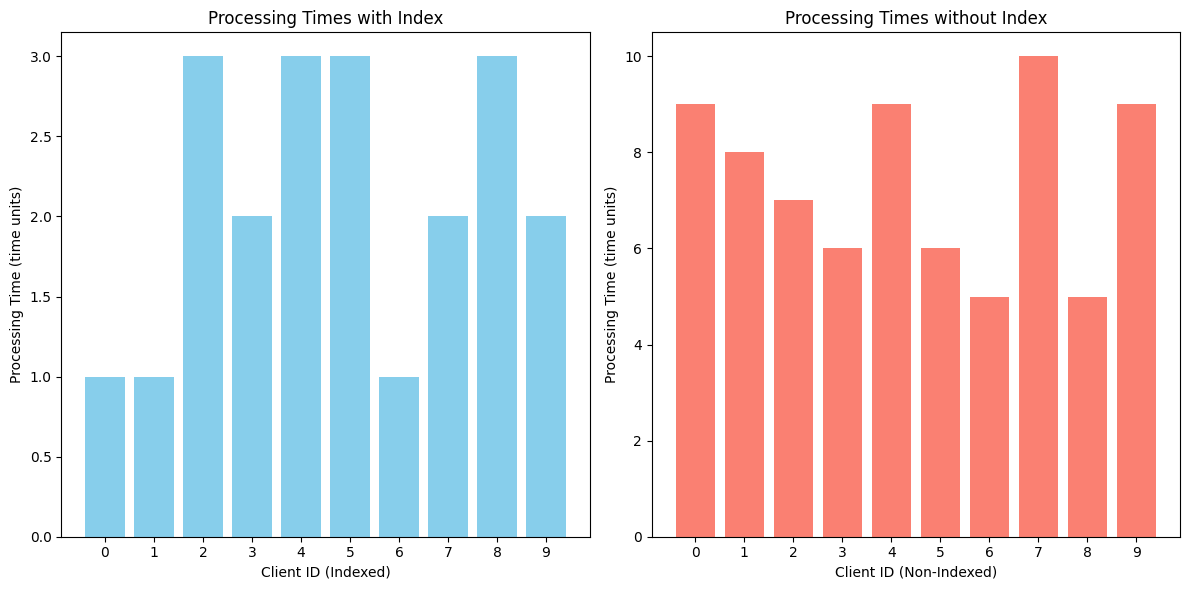

In [9]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt

# Constants for the simulation
NUM_CLIENTS = 20  # Number of clients
INDEXED_ACCESS_TIME = (1, 3)    # Min, Max processing time with index
NON_INDEXED_ACCESS_TIME = (5, 10)  # Min, Max processing time without index

# Lists to track processing times for later visualization
indexed_processing_times = []
non_indexed_processing_times = []

# Function to simulate accessing the database with an index
def indexed_access(env, client_id):
    print(f'Client {client_id} requesting indexed access at time {env.now}')
    process_time = random.randint(*INDEXED_ACCESS_TIME)
    yield env.timeout(process_time)

    indexed_processing_times.append(process_time)
    print(f'Client {client_id} finished indexed access at time {env.now} (process time: {process_time})')

# Function to simulate accessing the database without an index
def non_indexed_access(env, client_id):
    print(f'Client {client_id} requesting non-indexed access at time {env.now}')
    process_time = random.randint(*NON_INDEXED_ACCESS_TIME)
    yield env.timeout(process_time)

    non_indexed_processing_times.append(process_time)
    print(f'Client {client_id} finished non-indexed access at time {env.now} (process time: {process_time})')

# Function to create clients that access the database
def client_generator(env):
    for i in range(NUM_CLIENTS):
        if i % 2 == 0:
            env.process(indexed_access(env, i))  # Even clients use indexed access
        else:
            env.process(non_indexed_access(env, i))  # Odd clients use non-indexed access
        yield env.timeout(1)  # Time between client requests

# Main simulation setup
def run_simulation():
    # Create a SimPy environment
    env = simpy.Environment()
    # Start the client generator process
    env.process(client_generator(env))

    # Run the simulation
    env.run()

# Visualize the results
def plot_processing_times(indexed_times, non_indexed_times):
    plt.figure(figsize=(12, 6))

    # Plot indexed processing times
    plt.subplot(1, 2, 1)
    plt.bar(range(len(indexed_times)), indexed_times, color='skyblue')
    plt.title('Processing Times with Index')
    plt.xlabel('Client ID (Indexed)')
    plt.ylabel('Processing Time (time units)')
    plt.xticks(range(len(indexed_times)))

    # Plot non-indexed processing times
    plt.subplot(1, 2, 2)
    plt.bar(range(len(non_indexed_times)), non_indexed_times, color='salmon')
    plt.title('Processing Times without Index')
    plt.xlabel('Client ID (Non-Indexed)')
    plt.ylabel('Processing Time (time units)')
    plt.xticks(range(len(non_indexed_times)))

    plt.tight_layout()
    plt.show()

# Run the simulation
run_simulation()
# Plot the processing times
plot_processing_times(indexed_processing_times, non_indexed_processing_times)


Running simulation with 10 clients and DB capacity of 1
Avg Indexed Access Time: 2.60
Avg Non-Indexed Access Time: 6.80
Running simulation with 20 clients and DB capacity of 1
Avg Indexed Access Time: 1.80
Avg Non-Indexed Access Time: 7.80
Running simulation with 30 clients and DB capacity of 1
Avg Indexed Access Time: 2.00
Avg Non-Indexed Access Time: 8.20
Running simulation with 40 clients and DB capacity of 1
Avg Indexed Access Time: 1.95
Avg Non-Indexed Access Time: 7.25
Running simulation with 50 clients and DB capacity of 1
Avg Indexed Access Time: 1.80
Avg Non-Indexed Access Time: 7.40
Running simulation with 60 clients and DB capacity of 1
Avg Indexed Access Time: 1.70
Avg Non-Indexed Access Time: 7.77
Running simulation with 70 clients and DB capacity of 1
Avg Indexed Access Time: 2.20
Avg Non-Indexed Access Time: 7.29
Running simulation with 80 clients and DB capacity of 1
Avg Indexed Access Time: 1.88
Avg Non-Indexed Access Time: 7.78
Running simulation with 90 clients and D

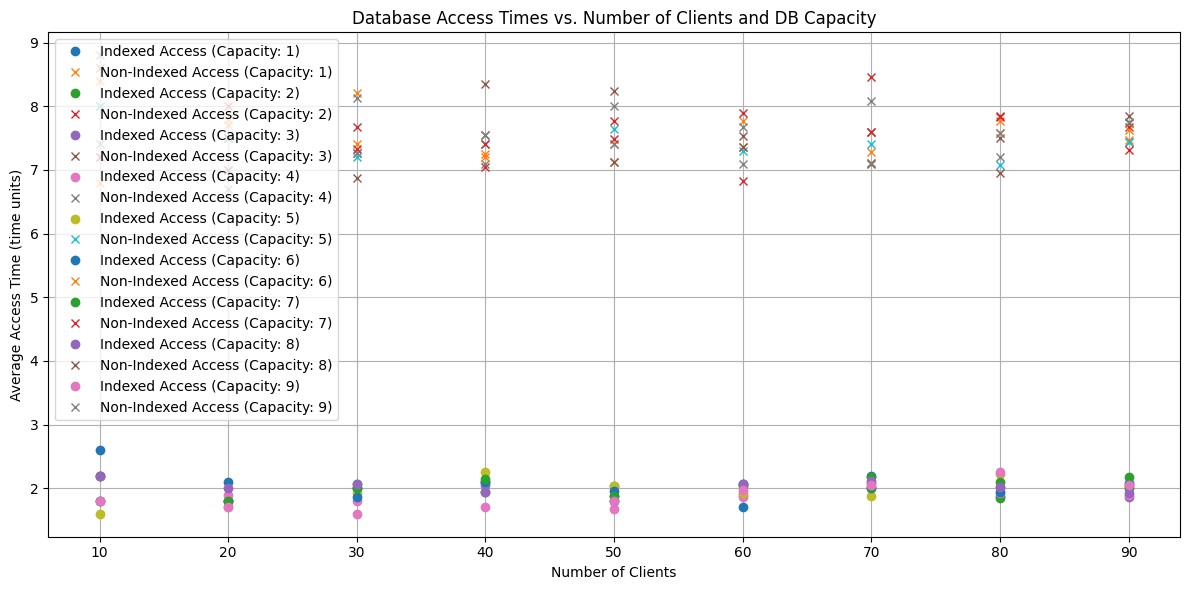

In [1]:
import simpy
import random
import matplotlib.pyplot as plt

# Constants for access times
INDEXED_ACCESS_TIME = (1, 3)          # Processing time with index (min, max)
NON_INDEXED_ACCESS_TIME = (5, 10)     # Processing time without index (min, max)

# Function to simulate accessing the database with an index
def indexed_access(env):
    process_time = random.randint(*INDEXED_ACCESS_TIME)
    yield env.timeout(process_time)
    return process_time

# Function to simulate accessing the database without an index
def non_indexed_access(env):
    process_time = random.randint(*NON_INDEXED_ACCESS_TIME)
    yield env.timeout(process_time)
    return process_time

# Client generator function
def client_generator(env, num_clients, db_resource, indexed_times, non_indexed_times):
    for client_id in range(num_clients):
        with db_resource.request() as request:
            yield request  # Wait for the database resource to become available
            if client_id % 2 == 0:
                # Indexed access
                process_time = yield env.process(indexed_access(env))
                indexed_times.append(process_time)
            else:
                # Non-indexed access
                process_time = yield env.process(non_indexed_access(env))
                non_indexed_times.append(process_time)

# Function to run the simulation
def run_simulation(num_clients, db_capacity):
    indexed_times = []
    non_indexed_times = []

    # Create a SimPy environment
    env = simpy.Environment()
    # Create a shared resource (the database)
    db_resource = simpy.Resource(env, capacity=db_capacity)

    # Start the client generator process
    env.process(client_generator(env, num_clients, db_resource, indexed_times, non_indexed_times))

    # Run the simulation
    env.run()

    return indexed_times, non_indexed_times

# Function to gather results and create plots
def analyze_performance(capacities, user_counts):
    avg_indexed_times = {capacity: [] for capacity in capacities}
    avg_non_indexed_times = {capacity: [] for capacity in capacities}

    for db_capacity in capacities:
        for num_clients in user_counts:
            print(f"Running simulation with {num_clients} clients and DB capacity of {db_capacity}")
            indexed_times, non_indexed_times = run_simulation(num_clients, db_capacity)

            # Calculate and store average access times
            avg_indexed = sum(indexed_times) / len(indexed_times) if indexed_times else 0
            avg_non_indexed = sum(non_indexed_times) / len(non_indexed_times) if non_indexed_times else 0
            
            avg_indexed_times[db_capacity].append(avg_indexed)
            avg_non_indexed_times[db_capacity].append(avg_non_indexed)

            # Print average access times for insights
            print(f"Avg Indexed Access Time: {avg_indexed:.2f}")
            print(f"Avg Non-Indexed Access Time: {avg_non_indexed:.2f}")

    # Plotting results
    plt.figure(figsize=(12, 6))
    for capacity in capacities:
        plt.plot(user_counts, avg_indexed_times[capacity], label=f'Indexed Access (Capacity: {capacity})', marker='o', linestyle='')
        plt.plot(user_counts, avg_non_indexed_times[capacity], label=f'Non-Indexed Access (Capacity: {capacity})', linestyle='', marker='x')

    plt.title('Database Access Times vs. Number of Clients and DB Capacity')
    plt.xlabel('Number of Clients')
    plt.ylabel('Average Access Time (time units)')
    plt.xticks(user_counts)
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Configuration to test (for resource capacities and user counts)
capacities = range(1, 10)  # Different resource capacities (number of database connections)
user_counts = range(10, 100, 10)  # Number of users (clients)

# Run performance analysis
analyze_performance(capacities, user_counts)



KeyboardInterrupt



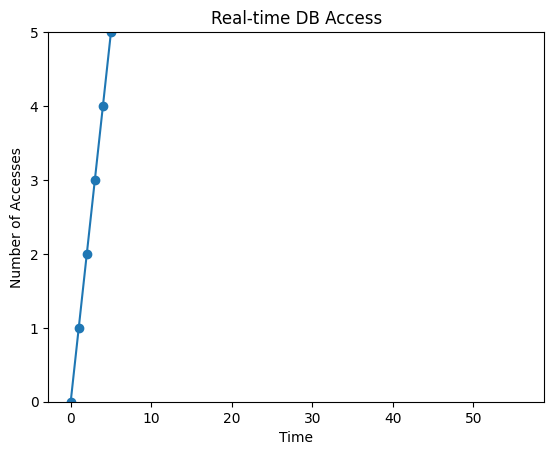

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import simpy
import random
from IPython.display import clear_output

# Constants
NUM_PLAYERS = 5
ACCESS_TIME = 1  # Time to access DB
RESOURCE_LIMIT = 2  # Max simultaneous DB accesses

# Function to simulate DB access
def access_db(env, player_id, db):
    with db.request() as request:
        yield request
        yield env.timeout(ACCESS_TIME)

# Function to create player processes
def player_process(env, player_id, db):
    while True:
        yield env.timeout(random.randint(1, 3))  # Random wait before next access
        yield env.process(access_db(env, player_id, db))

# Visualization Function
def plot_access_times(time_data):
    plt.clf()
    plt.plot(time_data, marker='o')
    plt.title('Real-time DB Access')
    plt.xlabel('Time')
    plt.ylabel('Number of Accesses')
    plt.ylim(0, NUM_PLAYERS)
    plt.pause(0.1)

# Simulation Function
def run_simulation():
    env = simpy.Environment()
    db = simpy.Resource(env, capacity=RESOURCE_LIMIT)

    # Create player processes
    for player_id in range(NUM_PLAYERS):
        env.process(player_process(env, player_id, db))
    
    time_data = []
    
    # Run simulation
    while True:
        env.step()  # Move simulation forward
        time_data.append(env.now)
        plot_access_times(list(range(len(time_data))))
        clear_output(wait=True)  # Clears the output for animation
        if env.now > 50:  # Stop after 50 time units
            break

# Start the simulation
run_simulation()


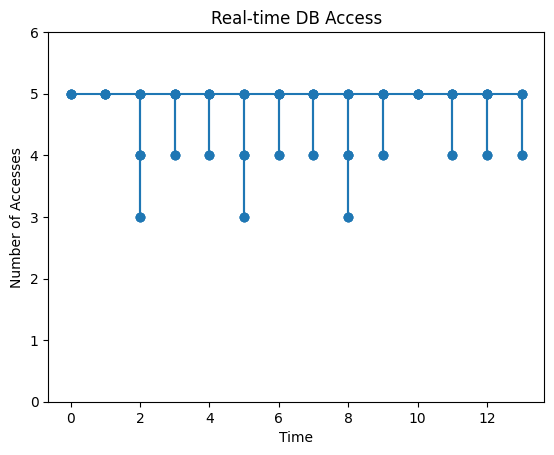

KeyboardInterrupt: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import simpy
import random
from IPython.display import clear_output

# Constants
NUM_PLAYERS = 5
ACCESS_TIME = 1  # Time to access DB
RESOURCE_LIMIT = 2  # Max simultaneous DB accesses

# Function to simulate DB access
def access_db(env, player_id, db):
    with db.request() as request:
        yield request
        yield env.timeout(ACCESS_TIME)

# Function to create player processes
def player_process(env, player_id, db):
    while True:
        yield env.timeout(random.randint(1, 3))  # Random wait before next access
        yield env.process(access_db(env, player_id, db))

# Visualization Function
def plot_access_times(time_data, access_counts):
    plt.clf()
    plt.plot(time_data, access_counts, marker='o')
    plt.title('Real-time DB Access')
    plt.xlabel('Time')
    plt.ylabel('Number of Accesses')

    # Dynamically set the y-axis limit
    max_y = max(max(access_counts), 1)  # Ensure at least 1 for visibility
    plt.ylim(0, max_y + 1)  # Add some padding
    plt.pause(0.1)

# Simulation Function
def run_simulation():
    env = simpy.Environment()
    db = simpy.Resource(env, capacity=RESOURCE_LIMIT)

    # Create player processes
    for player_id in range(NUM_PLAYERS):
        env.process(player_process(env, player_id, db))
    
    time_data = []
    access_counts = []  # List to keep track of number of accesses

    # Run simulation
    while True:
        env.step()  # Move simulation forward
        
        # Count how many players are currently in accessing the DB
        num_accesses = NUM_PLAYERS - len(db.queue)  # Total players - queued requests
        time_data.append(env.now)
        access_counts.append(num_accesses)
        
        plot_access_times(time_data, access_counts)
        clear_output(wait=True)  # Clears the output for animation

        # Stop after a certain duration to prevent overflow in a Jupyter Notebook
        if env.now > 50: 
            break

# Start the simulation
run_simulation()


In [10]:
%matplotlib inline

KeyboardInterrupt: 

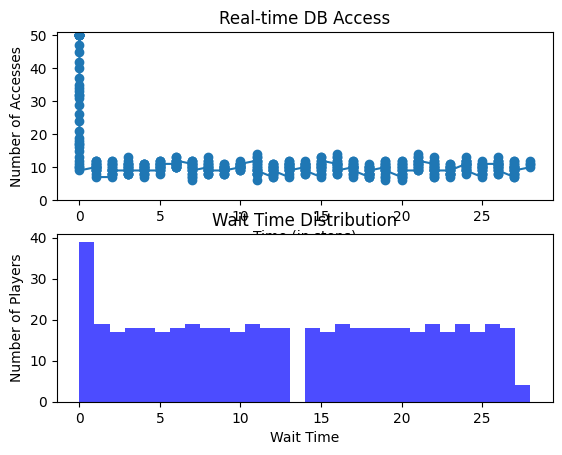

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import simpy
import random
from IPython.display import clear_output

# Constants
ACCESS_TIME = 1  # Time to access DB
RESOURCE_LIMIT = 3  # Max simultaneous DB accesses
PLOT_INTERVAL = 5  # Plot every 5 steps

# Simulation parameters
rps = 50  # Requests per second (directly related to number of players)

# Function to simulate DB access
def access_db(env, player_id, db, wait_times):
    with db.request() as request:
        # Record wait start time
        wait_start = env.now
        yield request  # Wait for DB access
        
        # Calculate wait time and store it
        wait_time = env.now - wait_start
        wait_times[player_id] = wait_time

        # Simulated access time
        yield env.timeout(ACCESS_TIME)

# Function to create player processes
def player_process(env, player_id, db, wait_times):
    while True:
        yield env.timeout(random.uniform(1, 3.5))  # Random wait (0.5 to 1.5 seconds)
        yield env.process(access_db(env, player_id, db, wait_times))

# Visualization Function
def plot_access_times(time_data, access_counts, rps):
    plt.clf()
    plt.subplot(2, 1, 1)  # Create a subplot for access counts
    plt.plot(time_data, access_counts, marker='o')
    plt.title('Real-time DB Access')
    plt.xlabel('Time (in steps)')
    plt.ylabel('Number of Accesses')
    plt.ylim(0, max(max(access_counts), 1) + 1)  # Dynamically set the y-axis limit
    
    plt.subplot(2, 1, 2)  # Create a subplot for wait times
    plt.hist(time_data, bins=30, alpha=0.7, color='blue')
    plt.title('Wait Time Distribution')
    plt.xlabel('Wait Time')
    plt.ylabel('Number of Players')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.pause(0.01)  # Reduced pause for faster animation

# Simulation Function
def run_simulation():
    env = simpy.Environment()
    db = simpy.Resource(env, capacity=RESOURCE_LIMIT)

    # Initialize wait times for each player
    wait_times = np.zeros(rps)

    # Create player processes
    for player_id in range(rps):
        env.process(player_process(env, player_id, db, wait_times))

    time_data = []
    access_counts = []  # List to keep track of number of accesses

    # Run simulation
    steps_per_plot = 5  # Number of steps per plot update
    while True:
        for _ in range(steps_per_plot):
            # Stepping the environment forward
            env.step()

        # Plotting every PLOT_INTERVAL steps
        time_data.append(env.now // steps_per_plot)  # Scaling time based on the number of steps
        num_accesses = rps - len(db.queue)  # Total players - queued requests
        access_counts.append(num_accesses)

        plot_access_times(time_data, access_counts, rps)
        clear_output(wait=True)  # Clears the output for animation

        # Stop after a certain duration to prevent overflow in a Jupyter Notebook
        if env.now // steps_per_plot > 100: 
            break

# Start the simulation
run_simulation()


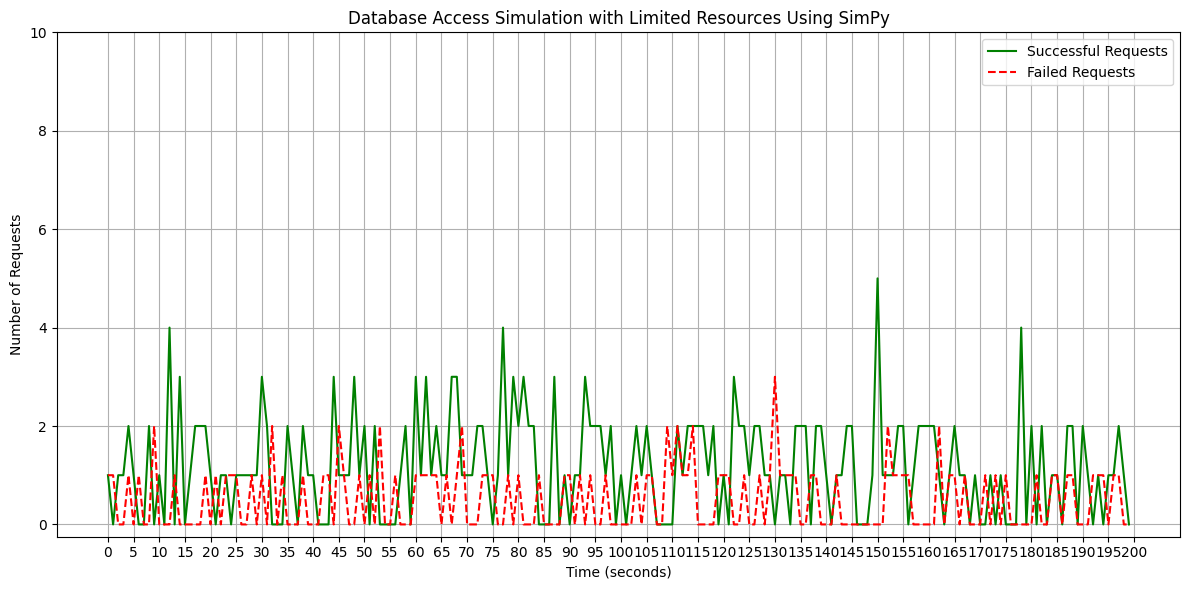

In [5]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_time = 200  # total simulation time in seconds
rps = 10  # requests per second
success_probability = 0.7  # Probability of a successful request
max_connections = 1  # Maximum number of concurrent database connections

# Results storage
successes = []
failures = []

# Define the request process
def request_process(env, db):
    while True:
        # Generate a request and attempt to access the database
        yield env.timeout(1 / rps)  # Wait for time interval according to RPS
        request_start_time = env.now
        
        with db.request() as request:
            yield request  # Wait for the resource (database connection) to become available
            
            # Simulate request processing time (to make it more realistic)
            yield env.timeout(np.random.exponential(scale=0.5))  # Simulated processing time
            
            # Determine if the request is successful
            if np.random.rand() < success_probability:  
                successes.append(request_start_time)
            else:
                failures.append(request_start_time)

# Set up the SimPy environment
env = simpy.Environment()
db = simpy.Resource(env, capacity=max_connections)  # Create a resource with limited capacity
env.process(request_process(env, db))  # Start the request process

# Run the simulation
env.run(until=total_time)

# Count results
success_count = [0] * total_time
failure_count = [0] * total_time

for t in range(total_time):
    success_count[t] = sum(1 for s in successes if int(s) == t)
    failure_count[t] = sum(1 for f in failures if int(f) == t)

# Plotting
plt.figure(figsize=(12, 6))

# Plot successful requests
plt.plot(range(total_time), success_count, label='Successful Requests', color='green', linestyle='-')
# Plot failed requests
plt.plot(range(total_time), failure_count, label='Failed Requests', color='red', linestyle='--')

# Adding titles and labels
plt.title('Database Access Simulation with Limited Resources Using SimPy')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, total_time + 1, 5))
plt.yticks(np.arange(0, rps + 1, 2))

# Show the plot
plt.tight_layout()
plt.show()


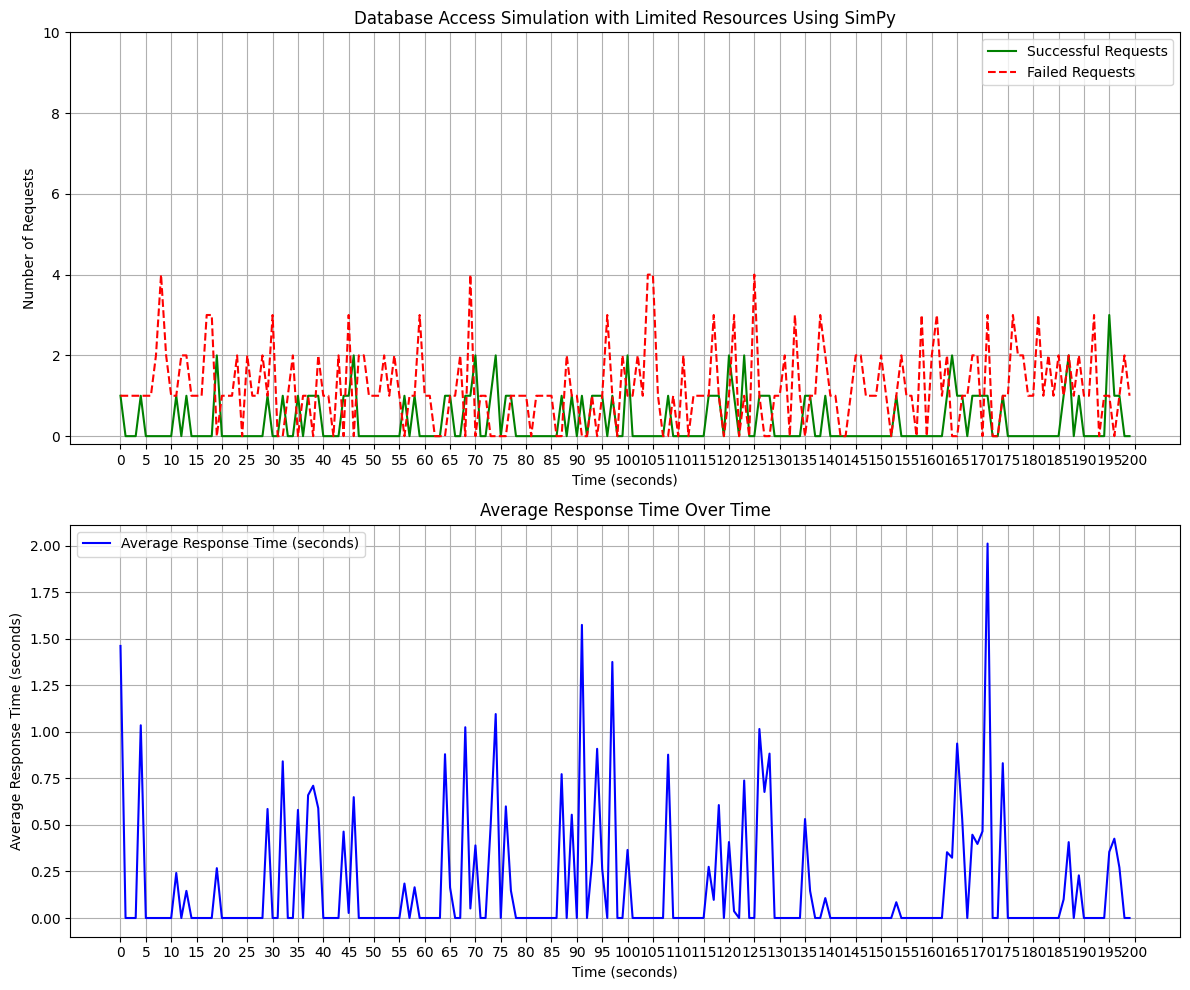

In [16]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_time = 200  # total simulation time in seconds
rps = 10  # requests per second
success_probability = 0.2  # Probability of a successful request
max_connections = 1  # Maximum number of concurrent database connections

# Results storage
successes = []
failures = []
response_times = []  # To store response times for successful requests

# Define the request process
def request_process(env, db):
    while True:
        # Generate a request and attempt to access the database
        yield env.timeout(1 / rps)  # Wait for time interval according to RPS
        request_start_time = env.now  # Record when the request was made
        
        with db.request() as request:
            yield request  # Wait for the resource (database connection) to become available
            
            # Simulate request processing time (to make it more realistic)
            processing_time = np.random.exponential(scale=0.5)
            yield env.timeout(processing_time)  # Simulate processing time
            
            # Determine if the request is successful
            if np.random.rand() < success_probability:  
                successes.append(request_start_time)
                end_time = env.now  # Record when the request ended
                response_times.append(end_time - request_start_time)  # Calculate the response time
            else:
                failures.append(request_start_time)

# Set up the SimPy environment
env = simpy.Environment()
db = simpy.Resource(env, capacity=max_connections)  # Create a resource with limited capacity
env.process(request_process(env, db))  # Start the request process

# Run the simulation
env.run(until=total_time)

# Prepare results for plotting
success_count = [0] * total_time
failure_count = [0] * total_time
average_response_time = [0] * total_time  # For keeping track of average response time

for t in range(total_time):
    success_count[t] = sum(1 for s in successes if int(s) == t)
    failure_count[t] = sum(1 for f in failures if int(f) == t)
    
    # Calculate average response time for successful requests only
    resp_times_for_t = [response_times[i] for i in range(len(successes)) if int(successes[i]) == t]
    if resp_times_for_t:
        average_response_time[t] = np.mean(resp_times_for_t)

# Plotting
plt.figure(figsize=(12, 10))

# Plot successful and failed requests
plt.subplot(2, 1, 1)
plt.plot(range(total_time), success_count, label='Successful Requests', color='green', linestyle='-')
plt.plot(range(total_time), failure_count, label='Failed Requests', color='red', linestyle='--')
plt.title('Database Access Simulation with Limited Resources Using SimPy')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, total_time + 1, 5))
plt.yticks(np.arange(0, rps + 1, 2))

# Plot average response time
plt.subplot(2, 1, 2)
plt.plot(range(total_time), average_response_time, label='Average Response Time (seconds)', color='blue', linestyle='-')
plt.title('Average Response Time Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Response Time (seconds)')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, total_time + 1, 5))

# Show the plots
plt.tight_layout()
plt.show()


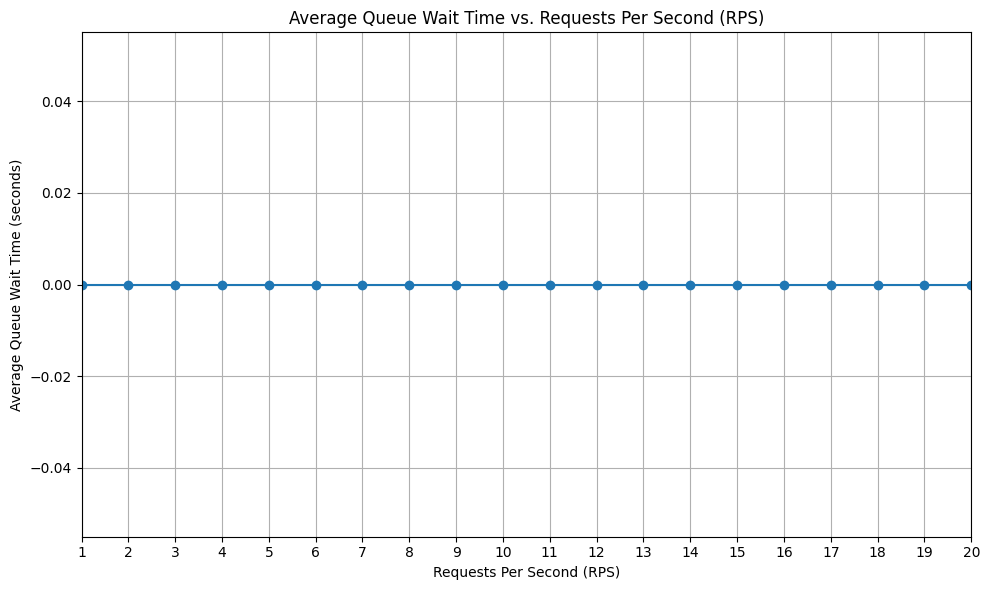

In [37]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_time = 2000  # total simulation time in seconds
success_probability = 0.8  # Probability of a successful request
max_connections = 5  # Maximum number of concurrent database connections
rps_values = np.arange(1, 21, 1)  # Test RPS values from 1 to 20

average_wait_times = []  # To store average wait times for different RPS

# Define the request process
def request_process(env, db, rps, wait_times):
    while True:
        # Generate a request and attempt to access the database
        yield env.timeout(1 / rps)  # Wait for time interval according to RPS
        request_start_time = env.now  # Record when the request was made
        
        with db.request() as request:
            wait_time = env.now - request_start_time  # Calculate wait time until resource is acquired
            wait_times.append(wait_time)  # Store the wait time
            
            yield request  # Wait for the resource (database connection) to become available
            
            # Simulate request processing time (optional)
            processing_time = np.random.exponential(scale=0.5)
            yield env.timeout(processing_time)  # Simulate processing time

# Main simulation function to simulate with a specific RPS
def simulate_with_rps(rps):
    # Set up the SimPy environment
    env = simpy.Environment()
    db = simpy.Resource(env, capacity=max_connections)  # Create a resource with limited capacity
    wait_times = []  # List to collect wait times
    env.process(request_process(env, db, rps, wait_times))  # Start the request process
    
    # Run the simulation
    env.run(until=total_time)
    
    # Calculate average wait time
    if wait_times:
        avg_wait_time = np.mean(wait_times)
    else:
        avg_wait_time = 0  # Avoid division by zero
    return avg_wait_time

# Main simulation loop for different RPS values
for rps in rps_values:
    avg_wait_time = simulate_with_rps(rps)
    average_wait_times.append(avg_wait_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rps_values, average_wait_times, marker='o', linestyle='-')
plt.title('Average Queue Wait Time vs. Requests Per Second (RPS)')
plt.xlabel('Requests Per Second (RPS)')
plt.ylabel('Average Queue Wait Time (seconds)')
plt.grid()
plt.xticks(np.arange(1, 21, 1))
plt.xlim(1, 20)
plt.tight_layout()
plt.show()
